## Szybka transformata Fouriera (FFT - Fast Fourier Transform)

Zapoznaj się ze sposobem działania transformacji Fouriera i jej praktycznym zastosowaniem. 

W poniższym ćwiczeniu korzystamy z biblioteki FFT będącej częścią pakietu scipy

In [0]:
from scipy import fft

#### Przykład 
Analiza sygnału wygenerowanego funkcją okresową $sin(2 \pi t)$. Częstotliowścią sygnału określamy liczbę pełnych zmian sygnału w określonej jednostce czasu. Przyjmując przedział $t:[0..1]$ częstotliwość funkcji $f(t) = sin(2 \pi t)$ wynozi 1 Hz. Zwizualizujmy ten sygnał: 

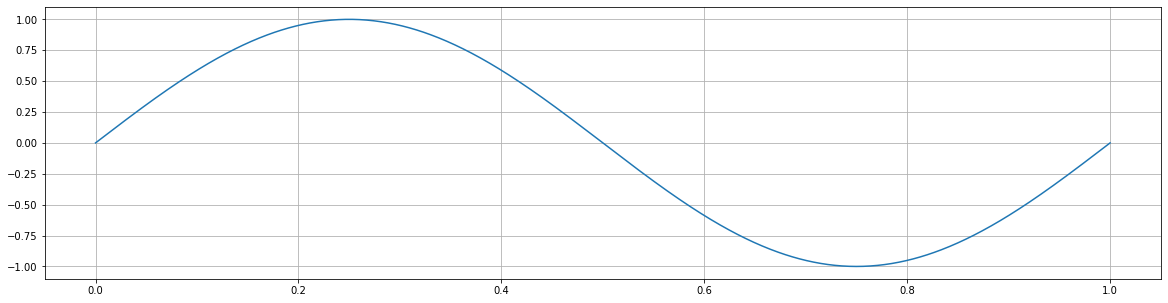

In [13]:
import numpy as np
# liczba próbek 
N = 1000
# częstotliwość 
F=1
t = np.linspace(0.0, 1.0, N)
ft = np.sin(2*np.pi*t*F)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(t,ft)
plt.grid()
plt.show()

Manipulując parametrem F w powyższym kodzie mozemy zmieniać częstotliwość sygnału. 

Zastosujmy szybkąd transformatę Fouriera do spróbkowanego przebiegu tej funkcji. 

Wynikiem działania algorytmu jest widmo sygnału czyli reprezentacja częstotliwościowa. Na podstawie N próbek sygnału wyliczane jest N wartości zespolonego widma, jednak zazwyczaj interesuje nas moduł widma, który możemy wyznaczyć funkcją np.abs(). Element yf[0] zawiera składową średnią sygnału, yf[1:n//2] zawiera współczynniki odpowiadające dodatnim częstościom, a yf[n//2+1:]  współczynniki odpowiadające ujemnym częstościom. Dla naszych potrzeb wystarczy zwizualizować połowę tablicy yf (w tym przypadku druga część zawiera lustrzaną kopie widam z pierwszej części tablicy). 


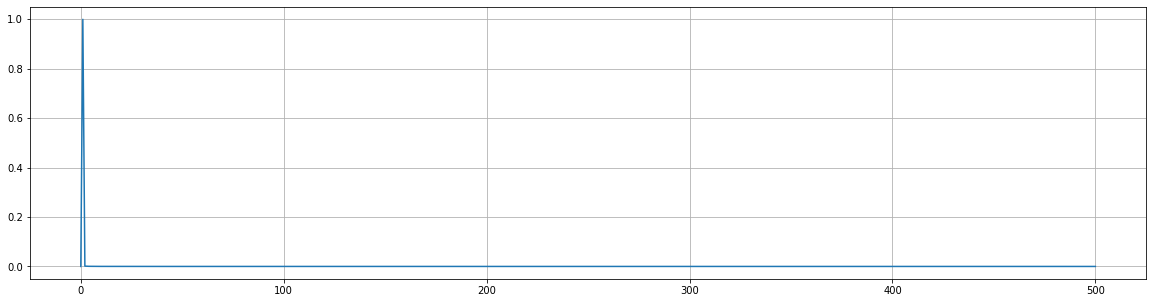

In [14]:
# odstęp próbkowanie
T = 1.0 / N
yf = fft.fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

### Zadanie 1
Wygeneruj sygnał sinusoidalny składający się z dwóch lub więcej składowych o różnych częstotliwościach. Zwizualizuj sygnał i dokonaj jego analizy z wykorzystaniem FFT. 


2 składowe:


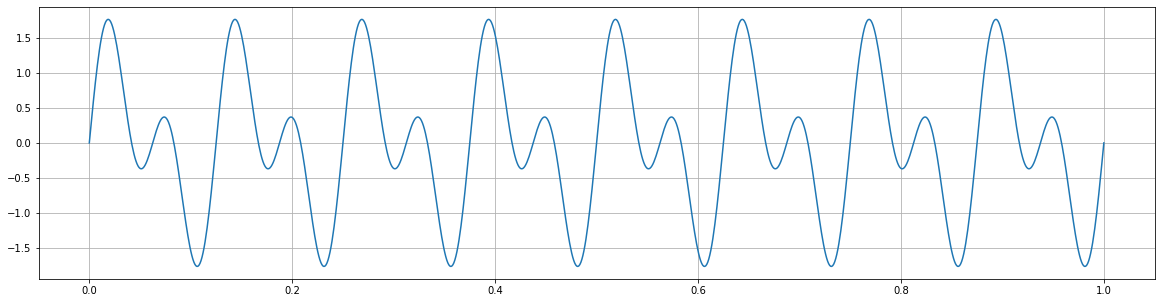

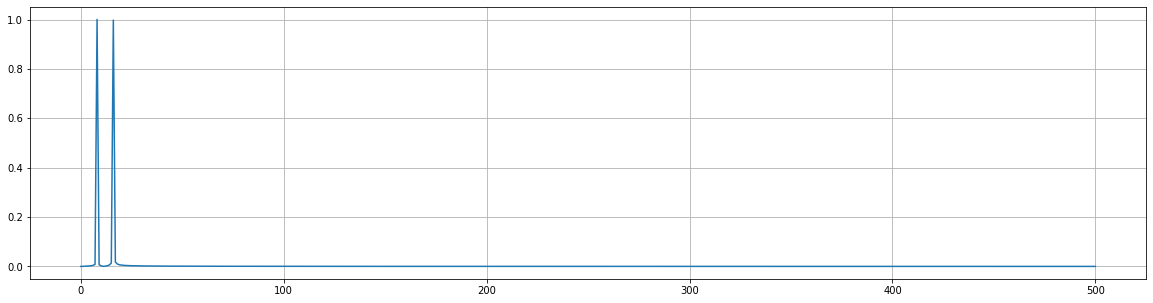

4 składowe:


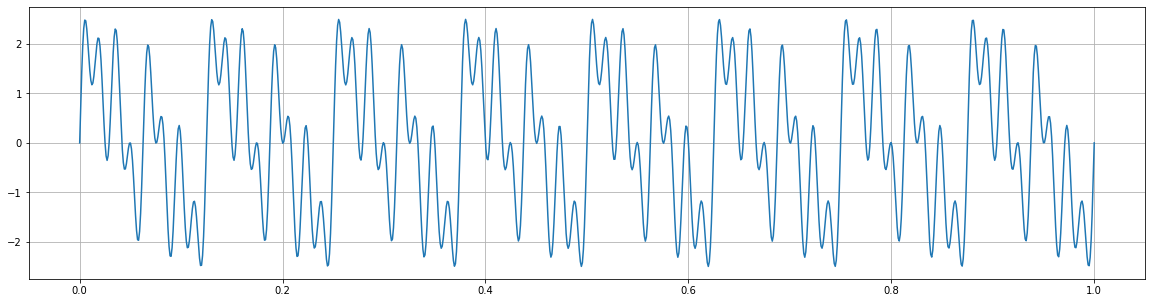

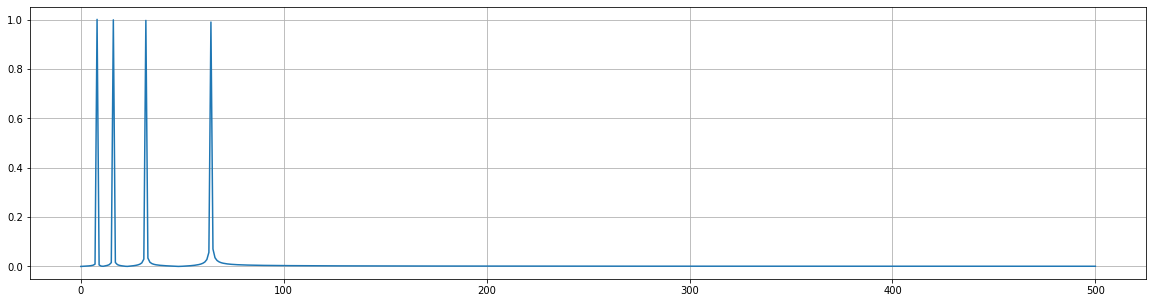

8 składowych:


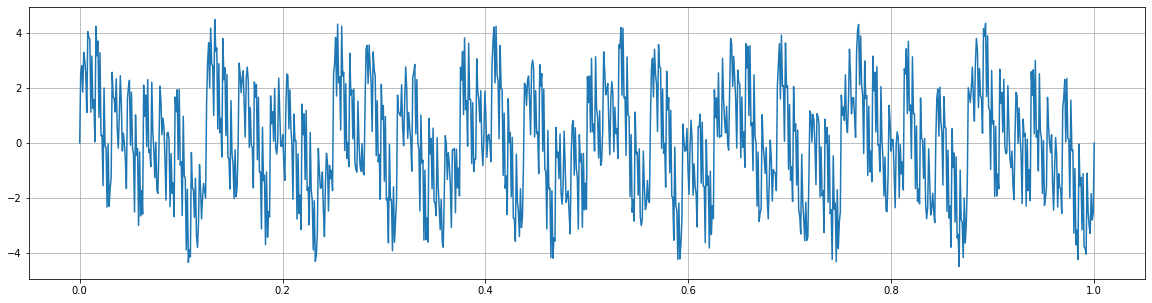

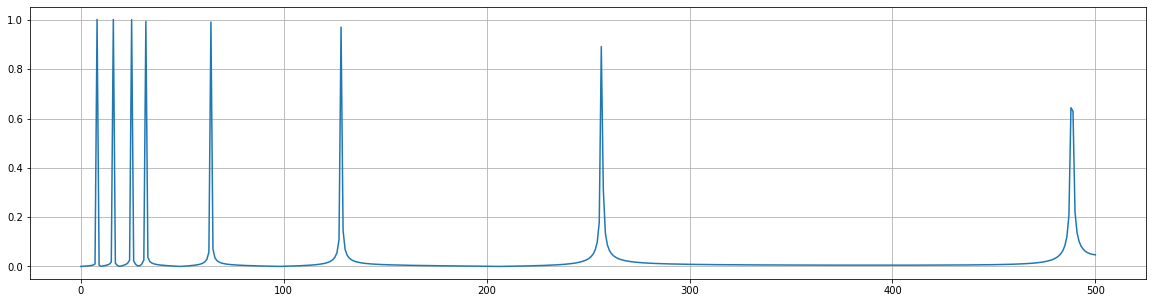

In [15]:
def generate_and_visualize(F, ft=0): 
  for i in range(len(F)):
    ft += np.sin(2*np.pi*t*F[i])
  plt.plot(t,ft)
  plt.grid()
  plt.show()
  return ft

def analyze(ft):
  T = 1.0 / N
  yf = fft.fft(ft)
  xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
  plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
  plt.grid()
  plt.show()

print('2 składowe:')
F2 = [8, 16]
ft2 = generate_and_visualize(F2)
analyze(ft2)

print('4 składowe:')
F4 = [8, 16, 32, 64]
ft4 = generate_and_visualize(F4)
analyze(ft4)

print('8 składowych:')
F8 = [8, 16, 32, 64, 128, 256, 512, 1024]
ft8 = generate_and_visualize(F8)
analyze(ft8)

### Zadanie 2
Odszumianie sygnału. 
1. Wypełniamy tablicę wartościami funkcji sinus ("sygnał") zaburzonej niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją rand(). 
2. Proszę narysować wykres zaszumionej funkcji. 
3. Wykonać FFT dla takiego sygnału i narysować wykres transformaty Fouriera (widmo) tego sygnału (jak poprzednio). Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału. 
4. Przeprowadzić odwrotną transformatę funkcją ifft(). Narysować wykres otrzymanej funkcji dla częsci rzeczywistej. Porównać z wejściowym wykresem sygnału. 





In [0]:
#1
from random import random
F = 8
ft = []

for i in t:
    ft.append(np.sin(np.sin(2*np.pi*i*F) + random()))

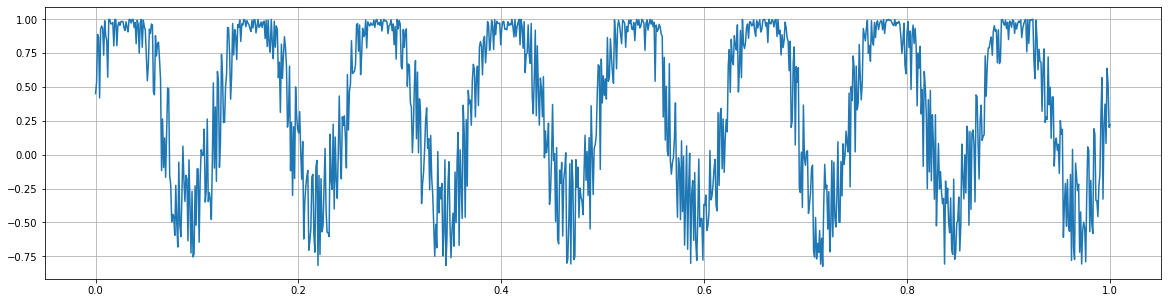

In [17]:
#2
plt.plot(t, ft)
plt.grid()
plt.show()

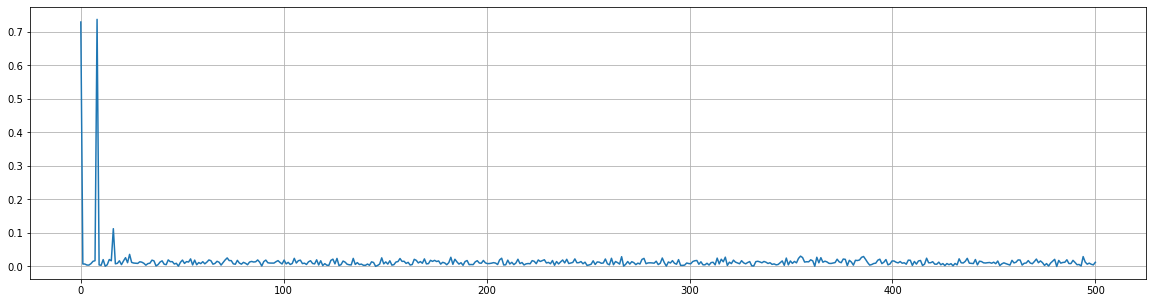

In [18]:
#3
T = 1.0 / N
yf = fft.fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
y = np.abs(yf[0:N//2])
plt.plot(xf, 2.0/N * y)
plt.grid()
plt.show()



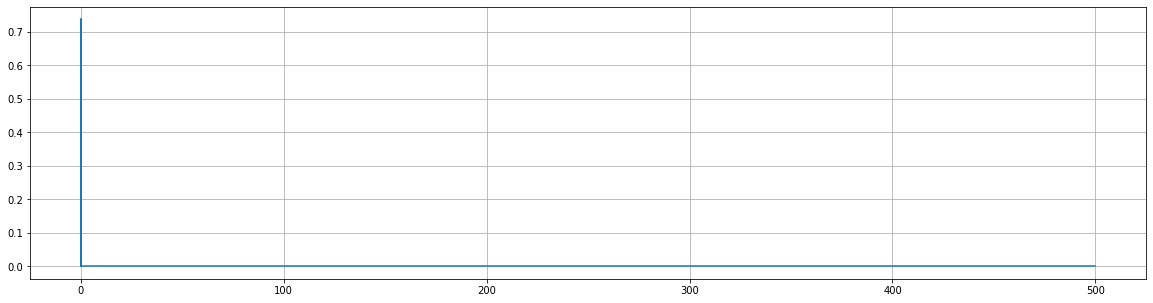

In [28]:
#3 po odszumieniu
for i in range(len(y)):
  if y[i] < 50:
    y[i] = 0
plt.plot(xf, 2.0/N * y)
plt.grid()
plt.show()


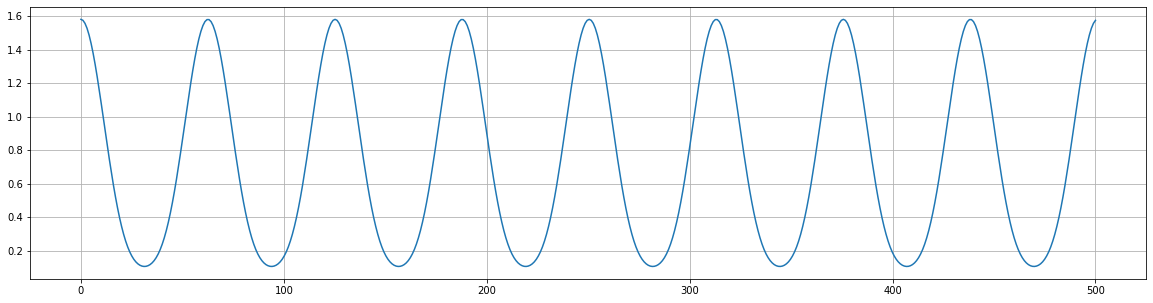

In [21]:
#4
ifft = fft.ifft(y)
plt.plot(xf, np.real(ifft))
plt.grid()
plt.show()

### Zadanie 3 
Proszę nagrać własny glos lub jakikolwiek inny dźwięk i przenalizowac go przy pomocy FFT (jak powyżej).
Następnie poeksperymentować (wyciąć wybrane częstotliwości), dokonać odwrotnej transformaty i odsłuchać efekt. 

Jako testowy dźwięk wykorzystałem 2 sekundowy fragment utworu 'Time' zespołu Pink Floyd. [link do nagrania](https://drive.google.com/file/d/1N0WL0AN6vipsAw0jkaHePIApk6ivxo6z/view?usp=sharing) - [wykres](https://drive.google.com/file/d/1YxrUr5OgjbW2uhQtxA--n_LZrQpLFnua/view?usp=sharing)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import fft


rate, data = wavfile.read('time_solo.wav')
samples_no = len(data)
normalized_data = data / (2.**15)
time = np.arange(0, float(samples_no), 1) / rate
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(time, normalized_data, linewidth=0.2, alpha=0.6, color='#0462b0')
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid()
plt.show()
plt.savefig('time_solo.png')

W następnym kroku wykonałem FFT. [wykres](https://drive.google.com/file/d/1CrAwzivZbxzGgienwWBkyDspDU5Z1_DI/view?usp=sharing)

In [0]:
T = 1.0 / samples_no
yf = fft.fft(normalized_data)
xf = np.linspace(0.0, 1.0 / (2.0*T), samples_no // 2)
plt.plot(xf, np.abs(yf[0:samples_no // 2]))
plt.grid()
plt.show()
plt.savefig('time_solo_fft.png')

Po przeprowadzeniu FFT pozbyłem się częstotliwości spoza zakrezu 8kHz - 16kHz. [wykres](https://drive.google.com/file/d/1_xHENgeYk9QQE6ChznS0x6RSa3dM08-a/view?usp=sharing)

In [0]:
for i in range(len(xf)):
    if 8000 < xf[i] < 16000:
        yf[i] = 0

plt.plot(xf, np.abs(yf[0:samples_no // 2]))
plt.grid()
plt.show()
plt.savefig('time_solo_remove.png')

Ostatecznie przeprowadziłem odwrotną transformatę i zapisałem zmodyfikowaną ścieżkę. [link do nagrania](https://drive.google.com/file/d/1ykighdNEL9u1Hc9BjsKX6fJ01WyZ5K_w/view?usp=sharing) - [wykres](https://drive.google.com/file/d/1jBSifcJ8Ux5BZXP5sdY97yZtOCgkQIhW/view?usp=sharing)

In [0]:
ifft = np.real(fft.ifft(yf))
wavfile.write("test_sound_after_fft.wav", len(ifft), ifft)

plt.plot(time, ifft)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid()
plt.show()
plt.savefig('test_sound_ifft.png')